In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Assessing Data

In [3]:
# Reading the csv file
df = pd.read_csv('3051011_PortoAlegre_Diaria.csv', decimal = ',')

In [4]:
df.head()

,Data,Valor,Mês,Ano,Mês-Ano,ano_valido,Valor_ano_valido,Verific_7dias,Média 7dias,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Código=,3051011
0,01/01/61,0.4,1,1961,jan-61,1961.0,0.4,1,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/61,0.0,1,1961,jan-61,1961.0,0.0,1,1.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/61,0.2,1,1961,jan-61,1961.0,0.2,1,1.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/61,2.4,1,1961,jan-61,1961.0,2.4,1,4.957143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/61,0.0,1,1961,jan-61,1961.0,0.0,1,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20605 entries, 0 to 20604
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              20605 non-null  object 
 1   Valor             20160 non-null  float64
 2   Mês               20605 non-null  int64  
 3   Ano               20605 non-null  int64  
 4   Mês-Ano           20605 non-null  object 
 5   ano_valido        19358 non-null  float64
 6   Valor_ano_valido  19292 non-null  float64
 7   Verific_7dias     20605 non-null  int64  
 8   Média 7dias       18742 non-null  float64
 9   Unnamed: 9        0 non-null      float64
 10  Unnamed: 10       0 non-null      float64
 11  Unnamed: 11       0 non-null      float64
 12  Unnamed: 12       0 non-null      float64
 13  Unnamed: 13       0 non-null      float64
 14  Código=           0 non-null      float64
 15  3051011           0 non-null      float64
dtypes: float64(11), int64(3), object(2)
memo

In [6]:
type(df.Data[1])

str

- Need to modify columns names
- Need to convert date into datetime object
- Need to delete unnecessary columns

In [7]:
df[df.Valor.isnull()]

,Data,Valor,Mês,Ano,Mês-Ano,ano_valido,Valor_ano_valido,Verific_7dias,Média 7dias,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Código=,3051011
2342,01/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2343,02/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2344,03/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2345,04/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2346,05/06/67,NaN,6,1967,jun-67,1967.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19718,27/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19719,28/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19720,29/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19721,30/12/14,NaN,12,2014,dez-14,2014.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 445 missing values for the precipitation height. Need to delete them or investigate a good method for filling the missing values.

# Cleaning Data

## Define

- Delete unnecessary columns.
- Modify columns names.
- Convert date into datetime object.
- Set date as index.
- Delete missing values.

### Delete unnecessary columns
#### Code

In [4]:
# Create a new df containing only necessary columns
df_modified = df.iloc[:,:4].copy()

#### Test

In [5]:
df_modified.head()

,Data,Valor,Mês,Ano
0,01/01/61,0.4,1,1961
1,02/01/61,0.0,1,1961
2,03/01/61,0.2,1,1961
3,04/01/61,2.4,1,1961
4,05/01/61,0.0,1,1961


### Modify columns names
#### Code

In [6]:
# 'prec' stands for precipitation
df_modified.rename(columns={'Data':'date','Valor':'prec', 'Mês':'month', 'Ano': 'year'}, inplace = True)

#### Test

In [7]:
df_modified.columns

Index(['date', 'prec', 'month', 'year'], dtype='object')

### Convert date to datetime object
#### Code

In [8]:
df_modified.date.iloc[:14244] = df_modified.date.iloc[:14244].str[:-2] + '19' + df_modified.date.iloc[:14244].str[-2:]
df_modified.date.iloc[14244:] = df_modified.date.iloc[14244:].str[:-2] + '20' + df_modified.date.iloc[14244:].str[-2:]

/Library/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df_modified.date = pd.to_datetime(df_modified.date, format = '%d/%m/%Y')

#### Test

In [10]:
type(df_modified.date[0])

pandas._libs.tslibs.timestamps.Timestamp

### Set date as index
#### Code

In [11]:
df_modified.set_index('date', inplace = True)

#### Test

In [12]:
df_modified.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=20605, freq=None)

## Analyze

## Visualize

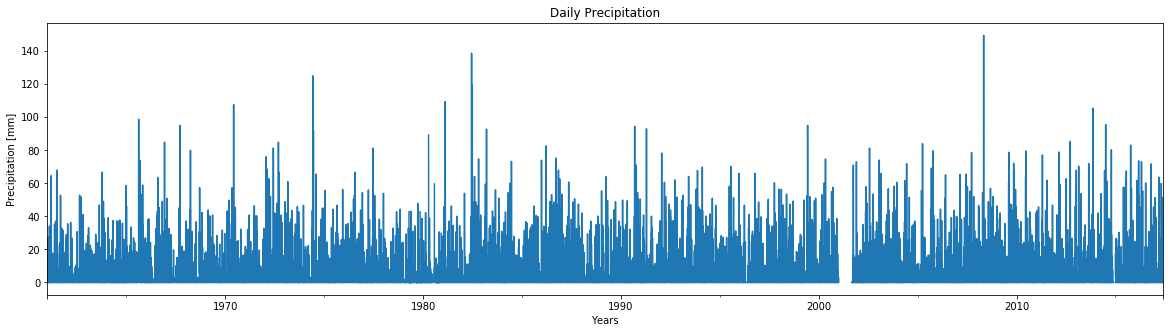

In [79]:
# Plotting daily precipitation values
df_modified.prec.plot(figsize = (20,5))
plt.xlabel('Years')
plt.ylabel('Precipitation [mm]')
plt.title('Daily Precipitation');

### Plot monthy average

In [13]:
# Get monthly total precipitation
monthly_sum = df_modified.groupby(by=[df_modified.year,df_modified.month]).prec.sum()

In [14]:
monthly_sum

year  month
1961  1         73.3
      2        153.2
      3        167.3
      4         54.4
      5         58.4
               ...  
2017  1        197.1
      2         50.5
      3        165.6
      4        114.9
      5        195.4
Name: prec, Length: 677, dtype: float64

In [15]:
# Compute monthly average
monthly_avg = monthly_sum.reset_index(level=1).groupby('month').mean()

In [16]:
monthly_avg.head()

,prec
month,
1,105.835088
2,106.522807
3,102.454386
4,92.868421
5,98.091228


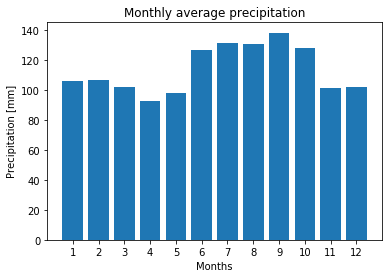

In [17]:
# Plot month average
x = np.arange(1,13)
plt.bar(x, monthly_avg.prec)
plt.xlabel('Months')
plt.ylabel('Precipitation [mm]')
plt.xticks(x)
plt.title('Monthly average precipitation');

### Plot total monthly rainfall over years

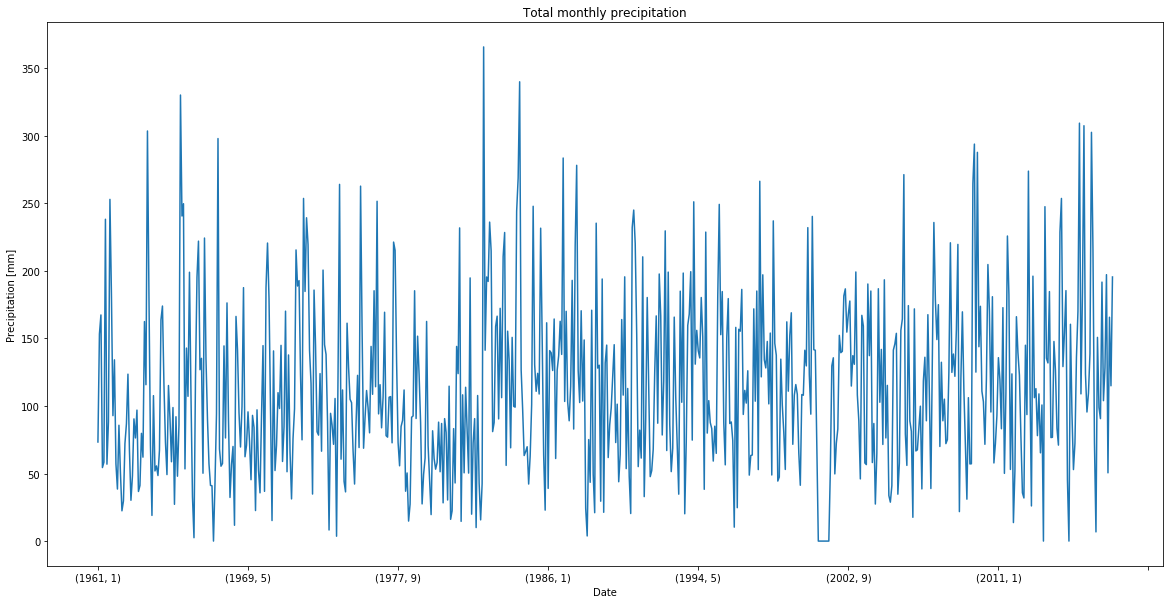

In [161]:
years = monthly_sum.reset_index(level=0).year.unique()
monthly_sum.plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]')
plt.title('Total monthly precipitation');